# Exam text analysis 
Sarah Hsu (8264937)

## Question 2
Choose two shows from discussions.p and compare the gender bias in the discussions on both shows. Explain why the two shows you choose are relevant to compare in this context and formulate a hypothesis.
Train two word embeddings models (one for each show). Compile a list of male and female related words that you deem relevant for your corpus and compare the gender biases between the discussions on the two shows you choose, using the method of the paper by Wevers. Interpret the results, relate them to your hypothesis, and discuss whether your results say something about the shows themselves or about the discussions on these shows.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from pandas import DataFrame
discussions = pd.read_pickle('/content/drive/MyDrive/B2_Data Mining/Data/discussions.p')
discussions = discussions
discussions.head()

,title,type,year,post
0,Better Call Saul,linear,2017,Walter. And there the chain ends.
1,Better Call Saul,linear,2016,I love this show. But it's hard to argue again...
2,Better Call Saul,linear,2017,What am I missing? A lot of reference to ribs...
3,Better Call Saul,linear,2018,"Oh come on Mike, he's a good little boy."
4,Better Call Saul,linear,2017,Look again 👀


In [ ]:
# Take a look at all titles's information
discussions.groupby('title').count()

,type,year,post
title,,,
Better Call Saul,5268,5268,5268
Black Mirror,4720,4720,4720
Breaking Bad,6424,6424,6424
Dark,2004,2004,2004
Fargo,680,680,680
Game of Thrones,15462,15462,15462
House of Cards,158,158,158
La Casa de Papel,150,150,150
Mindhunter,657,657,657


### *A statement on the relevance of your comparison and the hypothesis (ca. 150 words)
I choose two shows: "Breaking Bad" and "Ozark" then I will implement Wevers's approach with "money" category. 

First, both of the shows have similar story backgrounds which are related to financial problems that I think they can match more key words of money. The Breaking Bad talks about the main character produces drugs because he wants to earn a lot of money to secure his family's financial future before he dies. Likewise, Ozark talks about money laundering because the main character has to pay off tons of debt that he encounter some troubles with a drug cartel. 

Secondly, both of the main characters are males and fathers who are in an unfortunate situation. I think it will be interesting to look into the gender bias that how people discuss about the shows. 

Based on the two show's similarity in characters and plots, I assume they will have similar bias toward male because the plots depict more stories related to the male character about money issues.

### Train the embeddings model of "Breaking Bad"



In [ ]:
# Pre-processing all the posts of discussions by Spacy
import spacy
nlp = spacy.load("en_core_web_sm")
allposts = discussions.post.values
processed_texts = [text for text in nlp.pipe(allposts,  disable=["ner", "parser"])]

For the pre-processing steps, I remove punctuations and also do lemmatization because I found there are too much slangs that cause noises of bias analysis in following steps.

In [ ]:
# The subset of "Breaking Bad" posts
discussions['processed_texts'] = processed_texts
processed_texts_BB = discussions[discussions.title == "Breaking Bad"].processed_texts

# Remove punctuations, do lowercase and lemmatization but keep stop word
tokenized_texts_BB = [[word.lemma_.lower() for word in processed_text if not word.is_punct] for processed_text in processed_texts_BB]

In [ ]:
# Train the embeddings model of "Breaking Bad"
import gensim
from gensim.models import Word2Vec

tokenized_texts = tokenized_texts_BB

SIZE = 100 # dimensions of the embeddings
SG = 1 # I use skip-gram
WINDOW = 5 # the window size :the distances between the target words and its neighbors
N_WORKERS = 1 # number of workers to use
MIN_COUNT = 1 # because the corpus is not huge, I just keep everything

model_BB = Word2Vec(size=SIZE,
                sg=SG,
                window=WINDOW, 
                min_count=MIN_COUNT,
                workers=N_WORKERS)

model_BB.build_vocab(tokenized_texts)

model_BB.train(tokenized_texts,
           total_examples=model_BB.corpus_count,
           epochs=model_BB.epochs) 

(365822, 548570)

In [ ]:
import numpy as np

# Get the mean embeddings of male words on Breaking Bad model
# I also add some key characters' names to the gender list
male_words = ['he','his','man', 'men', 'him', 'father', 'son','husband','walter', 'jesse']
words = [word for word in male_words if word in model_BB.wv.vocab] # checks if word is in vocabulary (i.e. has been seen by the model before)
male_mean_embedding = np.mean([model_BB.wv[word] for word in male_words], axis=0)
print(male_mean_embedding.shape)

# Get the mean embeddings of female words on Breaking Bad model
female_words = ['she','female', 'woman','mother', 'daughter','wife','skyler','marie']
words = [word for word in female_words if word in model_BB.wv.vocab] # checks if word is in vocabulary (i.e. has been seen by the model before)
female_mean_embedding = np.mean([model_BB.wv[word] for word in female_words], axis=0)
print(female_mean_embedding.shape)


(100,)
(100,)


In [ ]:
# Take a look at the similar words to check the results are sensible or not
print(model_BB.wv.most_similar('man'))
print(model_BB.wv.most_similar('woman'))

[('damn', 0.9835809469223022), ('thank', 0.9832716584205627), ('fucking', 0.9816556572914124), ('yes', 0.9814798831939697), ('edit', 0.9811385869979858), ('longer', 0.9792422652244568), ('dude', 0.9780589938163757), ('yeah', 0.977643609046936), ('straight', 0.976722002029419), ('ted', 0.9750858545303345)]
[('answer', 0.9987077713012695), ('perfect', 0.9986470341682434), ('plus', 0.9986249208450317), ('search', 0.9984275102615356), ('wire', 0.9984076023101807), ('list', 0.9983881711959839), ('quality', 0.9983317852020264), ('piss', 0.9981971383094788), ('note', 0.9981412291526794), ('evil', 0.9981235265731812)]


In [ ]:
# Work on the category of "money"
import pandas as pd
from pandas import DataFrame
cats = pd.read_pickle('/content/drive/MyDrive/B2_Data Mining/Data/word_cats.p')
cats = cats.dropna()
cats.head()

,affect,posemo,negemo,social,family,cogproc,percept,body,work,leisure,money,relig,occupation
0,protesting,incentive,destruction,chick,ma's,comply,squeez,pussy,dotcom,dnd,portfolio,goddess,accountant
1,pretty,luck,beaten,ma's,niece,luck,sand,wears,employee,vacation,sale,karma,actor
2,sighs,freeing,battl,lets,stepkid,unquestion,moist,hearts,paper,hobb,stores,pastor,actress
3,warmth,pretty,protesting,son's,son's,pretty,warmth,asleep,earns,band,bets,temple,actuary
4,mooch,nicely,dumber,daddies,daddies,become,gloomy,gums,assign,skat,bank,holy,acupuncturist


In [ ]:
# Calculates the Frobenius-based distance between money words and the gender mean embedding of Breaking Bad
bias_BB = {}

# loop over all the words within money category in a list
money = cats['money'].values.tolist()

for word in money:
  if word in model_BB.wv.vocab: # checks if word is in vocabulary (i.e. has been seen by the model before)
    distance_male = np.linalg.norm(np.subtract(model_BB.wv[word], male_mean_embedding)) # distance between word and male_mean_embedding
    distance_female = np.linalg.norm(np.subtract(model_BB.wv[word], female_mean_embedding)) # distance between word and female_mean_embedding
    gender_bias_BB = distance_male - distance_female
    bias_BB[word] = gender_bias_BB

bias_BB = pd.DataFrame.from_dict(bias_BB, orient='index', columns=['Bias'])
bias_BB.sort_values('Bias', ascending=False)

,Bias
loan,0.128325
jackpot,0.127868
bonus,0.124230
fund,0.122323
beggar,0.119161
seller,0.117585
sale,0.116460
selling,0.113384
atm,0.111747
budget,0.108843


In the loop above, we caculate the "bais value = distance to male - distance to female." If the value of bias is negative that means the word bias toward male. The bias with a smaller value also means the more significant bias toward male. In contrast, a positive value means the word bias toward female.

In [ ]:
bias_BB['Bias'].mean()

0.036324497777968645

### Train the embeddings model of "Ozark"
pre-processing steps are same as the processes of Breaking Bad model

In [ ]:
# The subset of "Ozark"
processed_texts_ozark = discussions[discussions.title == "Ozark"].processed_texts

# Remove punctuations, do lowercase and lemmatization but keep stop word
tokenized_texts_ozark = [[word.lemma_.lower() for word in processed_text if not word.is_punct] for processed_text in processed_texts_ozark]

In [ ]:
# Train the embeddings model of "Ozark"
import gensim
from gensim.models import Word2Vec

tokenized_texts = tokenized_texts_ozark

# Parameters setting as the model of Breaking Bad
SIZE = 100 # dimensions of the embeddings(representing)
SG = 1 # I use skip-gram
WINDOW = 5 # the window size(the distances between the target words and its neighbors)
N_WORKERS = 1 # number of workers to use
MIN_COUNT = 1 # because the corpus is not huge, I just keep everything

model_ozark = Word2Vec(size=SIZE,
                sg=SG,
                window=WINDOW, 
                min_count=MIN_COUNT,
                workers=N_WORKERS)

model_ozark.build_vocab(tokenized_texts)

model_ozark.train(tokenized_texts,
           total_examples=model_ozark.corpus_count,
           epochs=model_ozark.epochs)

(140946, 213960)

In [ ]:
# Get the mean embeddings of male words on ozark model
# I also add some key characters' names to the gender list
male_words = ['he', 'male', 'man', 'men', 'father', 'son','marty','husband','jonah']
words = [word for word in male_words if word in model_ozark.wv.vocab] # checks if word is in vocabulary (i.e. has been seen by the model before)
male_mean_embedding = np.mean([model_ozark.wv[word] for word in male_words], axis=0)
print(male_mean_embedding.shape)

# Get the mean embeddings of female words on ozark model
female_words = ['her', 'female', 'woman', 'mother','daughter','wendy','wife','charlotte']
words = [word for word in female_words if word in model_ozark.wv.vocab] # checks if word is in vocabulary (i.e. has been seen by the model before)
female_mean_embedding = np.mean([model_ozark.wv[word] for word in female_words], axis=0)
print(female_mean_embedding.shape)


(100,)
(100,)


In [ ]:
print(model_ozark.wv.most_similar('marty'))
print(model_ozark.wv.most_similar('woman'))

[('ben', 0.9994434714317322), ('ruth', 0.9993201494216919), ('get', 0.9989938735961914), ('wendy', 0.9989310503005981), ('tell', 0.9987362623214722), ('even', 0.9986841678619385), ('try', 0.9986677169799805), ('how', 0.9986083507537842), ('want', 0.9985465407371521), ('helen', 0.9984966516494751)]
[('hit', 0.9997388124465942), ('consequence', 0.9997091293334961), ('fine', 0.9996984601020813), ('similar', 0.9996966123580933), ('clean', 0.9996939897537231), ('blow', 0.9996863603591919), ('full', 0.9996861219406128), ('grow', 0.9996858239173889), ('investigation', 0.9996798634529114), ('touch', 0.999679446220398)]


In [ ]:
# Calculates the Frobenius-based distance between money words and the gender mean embedding of Ozark
bias_ozark = {}

# # loop over all the words within money category in a list
for word in money:
  if word in model_ozark.wv.vocab: # checks if word is in vocabulary (i.e. has been seen by the model before)
    distance_male = np.linalg.norm(np.subtract(model_ozark.wv[word], male_mean_embedding)) # distance between word and male_mean_embedding
    distance_female = np.linalg.norm(np.subtract(model_ozark.wv[word], female_mean_embedding)) # distance between word and female_mean_embedding
    gender_bias_ozark = distance_male - distance_female # get the bias value
    bias_ozark[word] = gender_bias_ozark

bias_ozark = pd.DataFrame.from_dict(bias_ozark, orient='index', columns=['Bias'])
bias_ozark.sort_values('Bias', ascending=False)

,Bias
wealthy,0.056690
deposit,0.056514
dime,0.056270
debt,0.055985
lease,0.055952
owe,0.055913
credit,0.055755
revenue,0.055747
loan,0.055610
bet,0.055361


In [ ]:
bias_ozark['Bias'].mean()

0.03782986036755822

### Visualization the bias results

I visualize the bias relationship between the two shows with violin plot and boxplot because with the both graphs we can easily compare their bias distributions and see the quartiles clearly within the show.

In [ ]:
bias_ozark['Show'] = 'Ozark'
bias_BB['Show'] = 'Breaking Bad'
bias_both = bias_BB.append(bias_ozark)

Text(0, 0.5, 'Gender Bias')

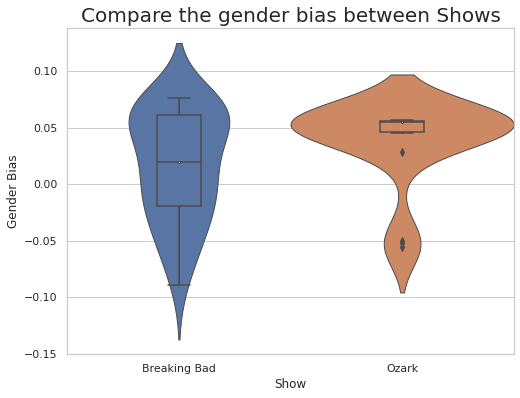

In [ ]:
# Plot the violin plot & box plot using seaborn package
# Parametor setting references: https://seaborn.pydata.org/generated/seaborn.violinplot.html
import matplotlib.pyplot as plt
import seaborn as sb

sb.set(style="whitegrid")
fig, ax = plt.subplots(1, figsize=(8,6), facecolor='white')

# The violinplot
sb.violinplot(data=bias_both, x ="Show", y ="Bias", linewidth=1, width=1)
# The boxplot
sb.boxplot(x ="Show", y ="Bias", data= bias_both, width=0.2, boxprops={'zorder': 2}, color=None)

# Add labels
plt.title("Compare the gender bias between Shows", fontsize = 20)
plt.xlabel("Show")
plt.ylabel("Gender Bias")


### *Interpretation and discussion (ca. 200 words)

The plots above illustrate the relationship of gender bias between Breaking Bad and Ozark. The negative bias value means the word biased towards male, whereas positive bias value towards female. In the graph, we can discover and compare their gender bias with violinplot which clearly illustrates the bias distributions and boxplot which shows the quartiles in each one.

It is striking that both of Breaking Bad and Ozark have more words related to money biased toward female and higher dense in Ozark. Actually, the result supprises me and is against to my hypothsis. However, I have gained insight into the data then found there are two critical points we can have more discussions about the justificaiton of the analysis.

First, the dataset is composed of multiple short texts posted by different viewers in discussion rather than what the producer wrote in the plots. Compared to analyze a journal in our previous exercise, the texts may not have notable patterns between these posts for the model to learn in this case.
Secondly, the words in the money category are actually more postive nouns related to business, like "credit", "bonus" and "fortune." However, the both shows discribe a poor man in the difficult financial situations which have fewer links to these money words that might cause more bias to the female instead.

In conclusion, it is also important to justify a useful, balanced and sufficient data for our reserch before we go into the conclusion. As the data in posts and catogory are not completely suitable for the bias analysis, in my perspective, the result is not fair and reliable enough.